<a href="https://colab.research.google.com/github/Naftal-Rainer/Network_Intrusion_Detection/blob/main/NID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Network Intrusion Detection has evolved to become a most significant feature in the field of study with the expansion in technology and increase in the usage of the same.

The project involves an Intrusion Detection System whose objective is to broadly classify network attacks as normal or
hostile attack based on the activities of the users. 

I'll use the following classifiers for this project:

1. Decision Tree Classifier.

2. Random Forest Classifier.


The NSL-KDD  Dataset has  been  used. The  Dataset  consist  a  total  of  42 attributes in which the last column is the class label.

The python libraries and packages i'll use are:
- Numpy
- Pandas
- Seaborn
- Matplotlib 
- Scikit-learn

# Preliminaries / Environment Setup

### Import common packages

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


### Load Dataset

In [5]:
# Dataset field names
data_Columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

# Load NSL_KDD train dataset
KDD_train = pd.read_table("/content/sample_data/KDDTrain+.txt", sep=",", names=data_Columns)

# Peak at the first 5 records.
KDD_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20.0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15.0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19.0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21.0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21.0


In [ ]:
KDD_train.shape

(125973, 43)

In [ ]:
# removes an unwanted extra field
KDD_train = KDD_train.iloc[:,:-1] 
KDD_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
# Load NSL_KDD test dataset

KDD_test = pd.read_table("/content/sample_data/KDDTest+.txt", sep=",", names=data_Columns)
KDD_test = KDD_test.iloc[:,:-1]
KDD_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan


In [ ]:
# Data dimensions
print('Training set dimension: {} rows, {} columns'.format(KDD_train.shape[0], KDD_train.shape[1]))
print('Testing set dimension: {} rows, {} columns'.format(KDD_test.shape[0], KDD_test.shape[1]))

Training set dimension: 125973 rows, 42 columns
Testing set dimension: 22544 rows, 42 columns


- Check for missing values

In [ ]:
print(KDD_train.isnull().sum().sum())
print(KDD_test.isnull().sum().sum())

0
0


# Data Preprocessing

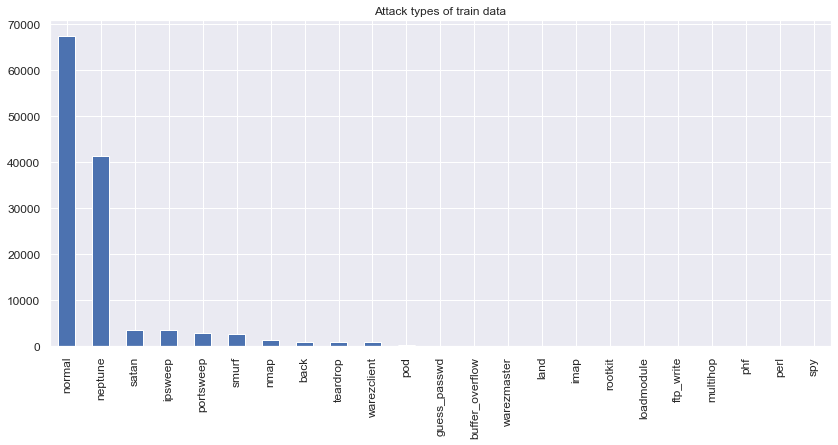

In [ ]:
# Check for attack types onn train data

(KDD_train['attack'].value_counts()).plot(kind='bar', figsize=(14, 6))
plt.title('Attack types of train data')
plt.show()

It can be seen from the visualization graphs of attack types of both train data and test data that the smurf has the largest number of all the attacks typs, and it belongs to the attack category of DOS. The second is the normal, and then neptune.

### Mapping attack fields to attack class

These attacks can be described as follows:

**Denial of Service Attack: DOS** is a kind of attack in which involves dispatching a large number of
requests to a particular website or server and that server will not be able to handle that number of
enormous requests and eventually, the server crashes and the website might be offline for several days.


**User to Root Attack: U2R** is a segment of exploit in which first the attacker starts with getting access
of a normal account on the desired system whether by sniffing into passwords of someone else or by
some other way and then locate any kind of vulnerabilities present to get the Root access of the system.


**Remote to Local Attack: R2L** - When an attacker does not have a direct access or any account in the system
but they have the ability to send malicious data packets the desired machine over a network so that
they can locate all kinds of vulnerabilities to get a local access as a legitimate user of that system. This
kind of attack is termed as Remote to Local Attack.


**Probing Attack: Probe** - When an attacker tries to collect all the information about all the computers
connected in a network for the evident purpose and tampering the security controls then these kinds of
attacks are categorized into Probe attack. 

In [ ]:
KDD_test['attack'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [ ]:
class_mapping = {'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS',
        'perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R','buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R',
        'sqlattack': 'U2R','httptunnel': 'U2R',
        'ftp_write': 'R2L','phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L',
        'spy': 'R2L','multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L',
        'xsnoop': 'R2L','xlock': 'R2L','sendmail': 'R2L',
        'normal': 'Normal'
        }

Apply attack class_mappings to the respective datasets.

In [ ]:

KDD_train['attack_class'] = KDD_train['attack'].apply(lambda x: class_mapping[x])
KDD_train.head(3)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,Normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,Normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,DoS


In [ ]:
KDD_test['attack_class'] = KDD_test['attack'].apply(lambda x: class_mapping[x])
KDD_test.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,attack_class
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,DoS
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,neptune,DoS
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,Normal


In [ ]:
KDD_test.shape

(22544, 43)

In [ ]:
# Drop attack field from both train and test data
KDD_train.drop(['attack'], axis=1, inplace=True)
KDD_test.drop(['attack'], axis=1, inplace=True)


# Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [ ]:
KDD_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
KDD_train['num_outbound_cmds'].value_counts()

0    125973
Name: num_outbound_cmds, dtype: int64

In [ ]:
# 'num_outbound_cmds' column has all 0 values. Therefore, it will be removed from both train and test dataset since it is a redundant field.

KDD_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
KDD_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

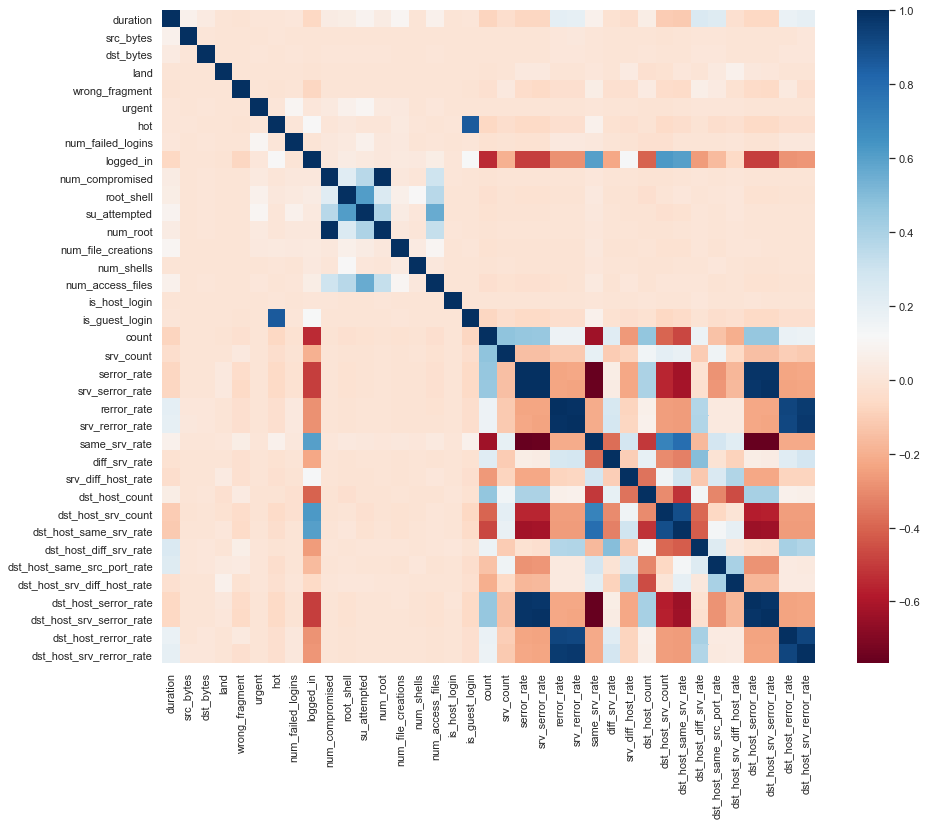

In [ ]:
# Correlation heat map of train data
sns.set(rc={'figure.figsize':(15, 12)})
sns.heatmap(KDD_train.corr(), cmap='RdBu', square=True, annot=False)
plt.show()

### Attack Class Distribution

In [ ]:
# Attack Class Distribution Totals
attack_class_freq_train = KDD_train[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_test = KDD_test[['attack_class']].apply(lambda x: x.value_counts())
attack_class_freq_train, attack_class_freq_test

(        attack_class
 Normal         67343
 DoS            45927
 Probe          11656
 R2L              995
 U2R               52,
         attack_class
 Normal          9711
 DoS             7458
 R2L             2754
 Probe           2421
 U2R              200)

From the above summary, notice that the classes are imbalanced.

In [ ]:

attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack_class,frequency_percent_train,attack_class,frequency_percent_test
Normal,67343,53.46,9711,43.08
DoS,45927,36.46,7458,33.08
Probe,11656,9.25,2421,10.74
R2L,995,0.79,2754,12.22
U2R,52,0.04,200,0.89


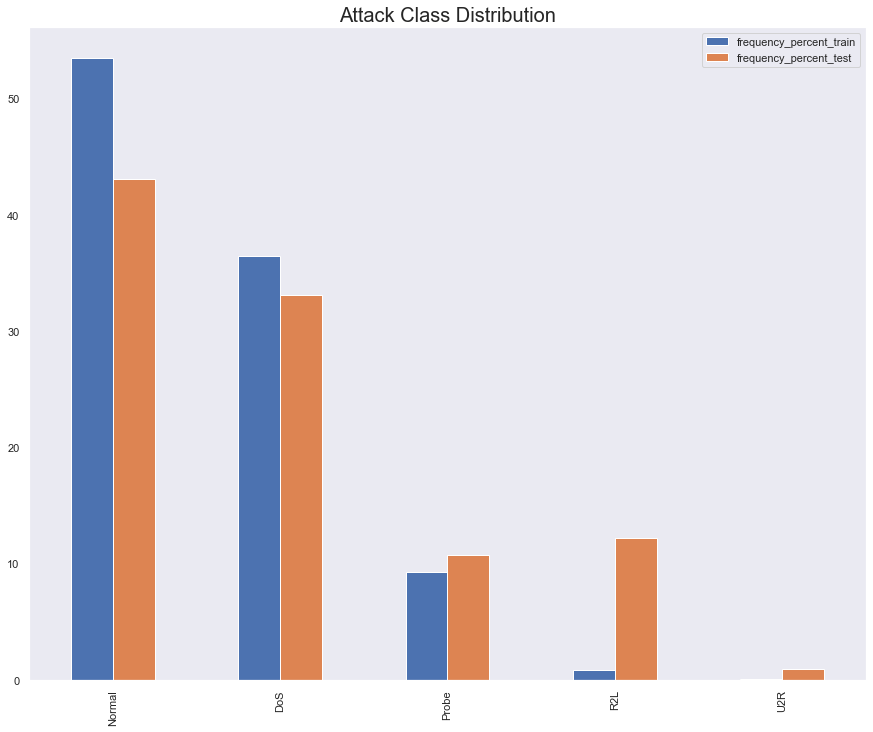

In [ ]:
# Attack class bar plot
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

### Scaling Numerical Features

In [ ]:
KDD_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [ ]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()

# Extract numerical attributes and scale it to have zero mean and unit variance  

cols = KDD_train.select_dtypes(include=['float64','int64']).columns
scaled_train = scaler.fit_transform(KDD_train.select_dtypes(include=['float64','int64']))
scaled_test = scaler.fit_transform(KDD_test.select_dtypes(include=['float64','int64']))

# Convert back to a dataframe

scaled_traindf = pd.DataFrame(scaled_train, columns = cols)
scaled_testdf = pd.DataFrame(scaled_test, columns = cols)

### Encoding of categorical Attributes

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_Encoder = LabelEncoder()

# Obtain categorical attributes from both training and test sets 
cat_train = KDD_train.select_dtypes(include=['object']).copy()
cat_test = KDD_test.select_dtypes(include=['object']).copy()

# Encode the categorical attributes
traincat = cat_train.apply(label_Encoder.fit_transform)
testcat = cat_test.apply(label_Encoder.fit_transform)

In [ ]:
# separate target column from encoded data 

encoded_train = traincat.drop(['attack_class'], axis=1)
encoded_test = testcat.drop(['attack_class'], axis=1)

cat_Ytrain = traincat[['attack_class']].copy()
cat_Ytest = testcat[['attack_class']].copy()

### Data Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter


# define columns and extract encoded train set for sampling 
sc_traindf = KDD_train.select_dtypes(include=['float64','int64'])
data_cols = pd.concat([scaled_traindf, encoded_train], axis=1).columns
refclass = np.concatenate((scaled_train, encoded_train.values), axis=1)
X = refclass

In [ ]:

# reshape target column to 1D array shape 
 
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)

c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)

# apply the random over-sampling

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_sample(X, y)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({1: 67343, 0: 45927, 2: 11656, 3: 995, 4: 52})
Resampled dataset shape Counter({1: 67343, 0: 67343, 3: 67343, 2: 67343, 4: 67343})


# Feature Selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Fit random forest classifier on the training set
rfc.fit(X_resampled, y_resampled)

names = []
for name, score in zip(data_cols, rfc.feature_importances_):
    names.append(name)
    print(name, score)

duration 0.029870019871474196
src_bytes 0.11601668559368566
dst_bytes 0.08002664013560849
land 1.4097070456844617e-05
wrong_fragment 0.002373170120155991
urgent 0.0002539176756642288
hot 0.015588886307544457
num_failed_logins 0.0016141287770734688
logged_in 0.059489236786251516
num_compromised 0.011886454689224614
root_shell 0.014009938263376289
su_attempted 0.00012686185268796077
num_root 0.002377434477058542
num_file_creations 0.013021247806883072
num_shells 0.0001301637036870579
num_access_files 0.0004926900546046359
is_host_login 0.0
is_guest_login 0.014991605513977409
count 0.03926734014225208
srv_count 0.03690198301410942
serror_rate 0.03285589910445406
srv_serror_rate 0.021439518329582682
rerror_rate 0.007065566453045825
srv_rerror_rate 0.005756218350410926
same_srv_rate 0.024971566868710254
diff_srv_rate 0.015764039451007336
srv_diff_host_rate 0.00787544071393963
dst_host_count 0.03075186157396352
dst_host_srv_count 0.09518063928915382
dst_host_same_srv_rate 0.03074187976295447

### Plot important features

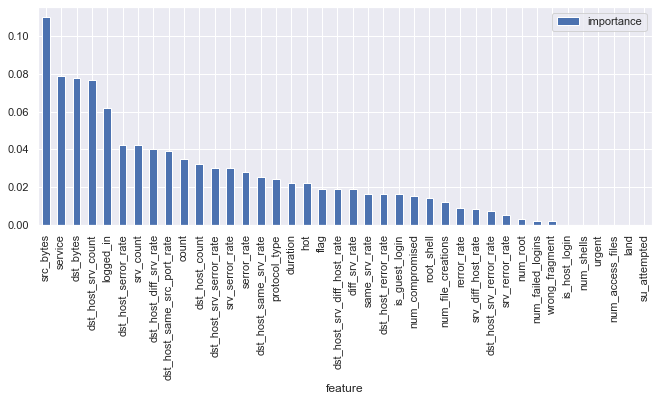

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# Fit random forest classifier on the training set
rfc.fit(X_resampled, y_resampled);

# Extract important features
score = np.round(rfc.feature_importances_,3)

importances = pd.DataFrame({'feature':data_cols,'importance':score})

importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
len(importances)

40

# Dataset Partition

In [ ]:
# define columns to new dataframe
newcol = list(data_cols)
newcol.append('attack_class')

# add a dimension to target
new_y_resampled = y_resampled[:, np.newaxis]

# create a dataframe from sampled data
resampled_arr = np.concatenate((X_resampled, new_y_resampled), axis=1)
resampled_df = pd.DataFrame(resampled_arr, columns = newcol)

In [ ]:
# create test dataframe
reftest = pd.concat([scaled_testdf, testcat], axis=1)
reftest['attack_class'] = reftest['attack_class'].astype(np.float64)
reftest['protocol_type'] = reftest['protocol_type'].astype(np.float64)
reftest['flag'] = reftest['flag'].astype(np.float64)
reftest['service'] = reftest['service'].astype(np.float64)

print(resampled_df.shape)
print(reftest.shape)

(336715, 41)
(22544, 41)


In [ ]:
from collections import defaultdict
classdict = defaultdict(list)

# create two-target classes (normal class and an attack class)  
attacklist = [('DoS', 0.0), ('Probe', 2.0), ('R2L', 3.0), ('U2R', 4.0)]
normalclass = [('Normal', 1.0)]

def create_classdict():
    '''This function subdivides train and test dataset into two-class attack labels''' 
    for j, k in normalclass: 
        for i, v in attacklist: 
            restrain_set = resampled_df.loc[(resampled_df['attack_class'] == k) | (resampled_df['attack_class'] == v)]
            classdict[j +'_' + i].append(restrain_set)
            # test labels
            reftest_set = reftest.loc[(reftest['attack_class'] == k) | (reftest['attack_class'] == v)]
            classdict[j +'_' + i].append(reftest_set)
        
create_classdict()
print(classdict.keys())

dict_keys(['Normal_DoS', 'Normal_Probe', 'Normal_R2L', 'Normal_U2R'])


In [ ]:
grpclass = []
for k, v in classdict.items():
    grpclass.append(k)
    print(k)

Normal_DoS
Normal_Probe
Normal_R2L
Normal_U2R


In [ ]:

pretrain = classdict['Normal_Probe'][0]
pretest = classdict['Normal_Probe'][1]
grpclass = 'Normal_Probe'

Xresampled_df = pretrain 
newtest = pretest

Xresampled_dfnew = Xresampled_df[names]
Xresdfnum = Xresampled_dfnew.drop(['service'], axis=1)
Xresdfcat = Xresampled_dfnew[['service']].copy()

Xtest_features = newtest[names]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()

# Transform train data
X_train_1hotenc = np.array(Xresdfcat)
    
# Transform test data
X_test_1hotenc =np.array(Xtestcat)

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresampled_df[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)


# Training Models

Use the best features for model training

In [ ]:
DTC_Classifier = DecisionTreeClassifier(splitter='random', random_state=42)
DTC_Classifier.fit(X_train, y_train)

RF_Classifier = RandomForestClassifier(n_jobs=-1, random_state=42)
RF_Classifier.fit(X_train, y_train)

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=RF_Classifier,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)

# Model Evaluation

In [ ]:
# from sklearn import metrics

# models = []
# models.append(('Decision Tree Classifier', DTC_Classifier))
# models.append(('RandomForest Classifier', RF_Classifier))

# for i, model in models:
#     scores = cross_val_score(model, X_train, Y_train, cv=4)
#     accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
#     confusion_matrix = metrics.confusion_matrix(Y_train, model.predict(X_train))
#     classification = metrics.classification_report(Y_train, model.predict(X_train))
#     print()
#     print('============================== {} {} Model Evaluation =============================='.format(grpclass_, i))
#     print()
#     print ("Cross Validation Mean Score:" "\n", scores.mean())
#     print()
#     print ("Model Accuracy:" "\n", accuracy)
#     print()
#     print("Confusion matrix:" "\n", confusion_matrix)
#     print()
#     print("Classification report:" "\n", classification) 
#     print()


============================== Normal_Probe Decision Tree Classifier Model Evaluation ==============================

Model Accuracy:
 0.8910319815364326

Confusion matrix:
 [[9499  212]
 [1110 1311]]

Classification report:
               precision    recall  f1-score   support

         1.0       0.90      0.98      0.93      9711
         2.0       0.86      0.54      0.66      2421

    accuracy                           0.89     12132
   macro avg       0.88      0.76      0.80     12132
weighted avg       0.89      0.89      0.88     12132


Optimal number of features : 26


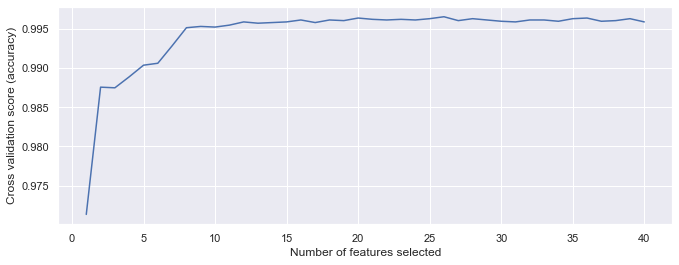


============================== Normal_Probe RandomForest Classifier Model Evaluation ==============================

Model Accuracy:
 0.9152654137817342

Confusion matrix:
 [[9410  301]
 [ 727 1694]]

Classification report:
               precision    recall  f1-score   support

         1.0       0.93      0.97      0.95      9711
         2.0       0.85      0.70      0.77      2421

    accuracy                           0.92     12132
   macro avg       0.89      0.83      0.86     12132
weighted avg       0.91      0.92      0.91     12132


Optimal number of features : 26


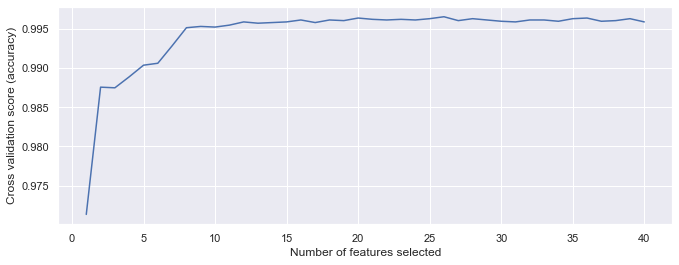

In [ ]:
from sklearn import metrics

models = []
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('RandomForest Classifier', RF_Classifier))

for i, model in models:
    accuracy = metrics.accuracy_score(Y_test, model.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))
    classification = metrics.classification_report(Y_test, model.predict(X_test))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    # print('================================ {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()  
    rfecv.fit(X_test, Y_test)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (accuracy)")
    plt.plot(
        range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
        rfecv.grid_scores_,
    )
    plt.show()


============================== Normal_DoS Decision Tree Classifier Model Evaluation ==============================

Model Accuracy:
 0.5532646048109966

Confusion matrix:
 [[   0 2794 4664]
 [   0 9499  212]
 [   0    0    0]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7458
         1.0       0.77      0.98      0.86      9711
         2.0       0.00      0.00      0.00         0

    accuracy                           0.55     17169
   macro avg       0.26      0.33      0.29     17169
weighted avg       0.44      0.55      0.49     17169


Optimal number of features : 26


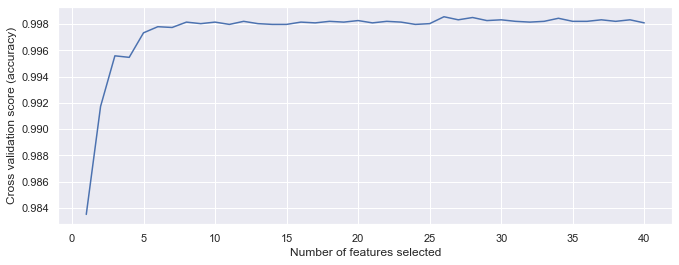


============================== Normal_DoS RandomForest Classifier Model Evaluation ==============================

Model Accuracy:
 0.5480808433805114

Confusion matrix:
 [[   0 3599 3859]
 [   0 9410  301]
 [   0    0    0]]

Classification report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      7458
         1.0       0.72      0.97      0.83      9711
         2.0       0.00      0.00      0.00         0

    accuracy                           0.55     17169
   macro avg       0.24      0.32      0.28     17169
weighted avg       0.41      0.55      0.47     17169


Optimal number of features : 26


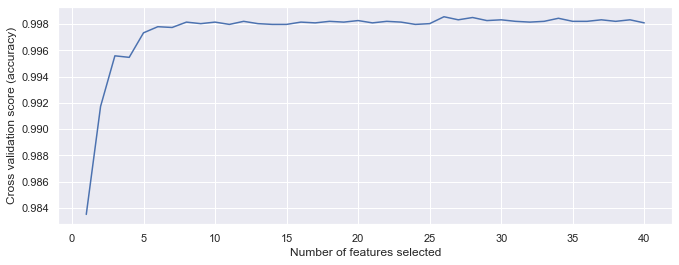

In [ ]:
pretrain = classdict['Normal_DoS'][0]
pretest = classdict['Normal_DoS'][1]
grpclass = 'Normal_DoS'



Xresampled_df = pretrain 
newtest = pretest

Xresampled_dfnew = Xresampled_df[names]
Xresdfnum = Xresampled_dfnew.drop(['service'], axis=1)
Xresdfcat = Xresampled_dfnew[['service']].copy()

Xtest_features = newtest[names]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()

# Transform train data
X_train_1hotenc = np.array(Xresdfcat)
    
# Transform test data
X_test_1hotenc =np.array(Xtestcat)

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresampled_df[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)


for i, model in models:
    accuracy = metrics.accuracy_score(Y_test, model.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))
    classification = metrics.classification_report(Y_test, model.predict(X_test))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()  
    rfecv.fit(X_test, Y_test)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (accuracy)")
    plt.plot(
        range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
        rfecv.grid_scores_,
    )
    plt.show()


============================== Normal_R2L Decision Tree Classifier Model Evaluation ==============================

Model Accuracy:
 0.7620537505014039

Confusion matrix:
 [[9499  212    0]
 [   0    0    0]
 [2660   94    0]]

Classification report:
               precision    recall  f1-score   support

         1.0       0.78      0.98      0.87      9711
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00      2754

    accuracy                           0.76     12465
   macro avg       0.26      0.33      0.29     12465
weighted avg       0.61      0.76      0.68     12465


Optimal number of features : 27


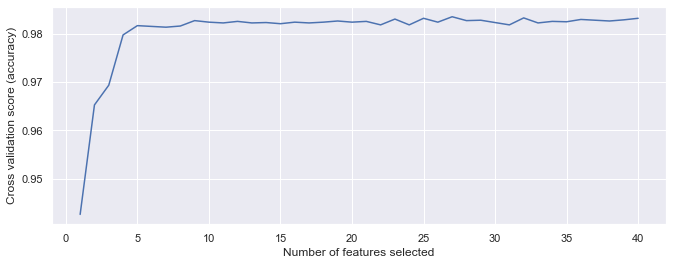


============================== Normal_R2L RandomForest Classifier Model Evaluation ==============================

Model Accuracy:
 0.7549137585238668

Confusion matrix:
 [[9410  301    0]
 [   0    0    0]
 [2617  137    0]]

Classification report:
               precision    recall  f1-score   support

         1.0       0.78      0.97      0.87      9711
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00      2754

    accuracy                           0.75     12465
   macro avg       0.26      0.32      0.29     12465
weighted avg       0.61      0.75      0.67     12465


Optimal number of features : 27


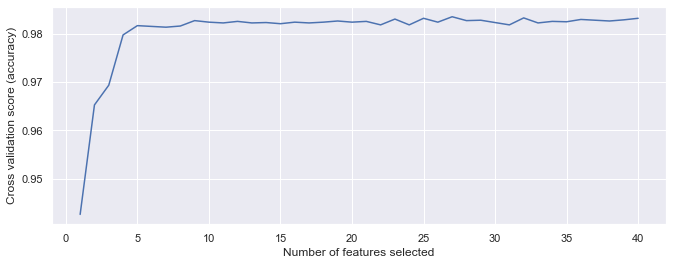

In [ ]:
pretrain = classdict['Normal_R2L'][0]
pretest = classdict['Normal_R2L'][1]
grpclass = 'Normal_R2L'



Xresampled_df = pretrain 
newtest = pretest

Xresampled_dfnew = Xresampled_df[names]
Xresdfnum = Xresampled_dfnew.drop(['service'], axis=1)
Xresdfcat = Xresampled_dfnew[['service']].copy()

Xtest_features = newtest[names]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()

# Transform train data
X_train_1hotenc = np.array(Xresdfcat)
    
# Transform test data
X_test_1hotenc =np.array(Xtestcat)

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresampled_df[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)


for i, model in models:
    accuracy = metrics.accuracy_score(Y_test, model.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))
    classification = metrics.classification_report(Y_test, model.predict(X_test))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()  
    rfecv.fit(X_test, Y_test)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (accuracy)")
    plt.plot(
        range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
        rfecv.grid_scores_,
    )
    plt.show()


============================== Normal_U2R Decision Tree Classifier Model Evaluation ==============================

Model Accuracy:
 0.9584300272424578

Confusion matrix:
 [[9499  212    0]
 [   0    0    0]
 [ 120   80    0]]

Classification report:
               precision    recall  f1-score   support

         1.0       0.99      0.98      0.98      9711
         2.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00       200

    accuracy                           0.96      9911
   macro avg       0.33      0.33      0.33      9911
weighted avg       0.97      0.96      0.96      9911


Optimal number of features : 39


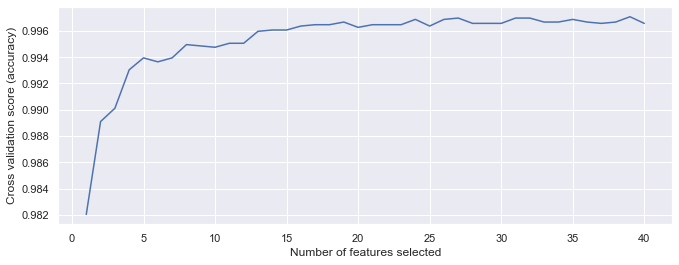


============================== Normal_U2R RandomForest Classifier Model Evaluation ==============================

Model Accuracy:
 0.9494501059428917

Confusion matrix:
 [[9410  301    0]
 [   0    0    0]
 [ 179   21    0]]

Classification report:
               precision    recall  f1-score   support

         1.0       0.98      0.97      0.98      9711
         2.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00       200

    accuracy                           0.95      9911
   macro avg       0.33      0.32      0.33      9911
weighted avg       0.96      0.95      0.96      9911


Optimal number of features : 39


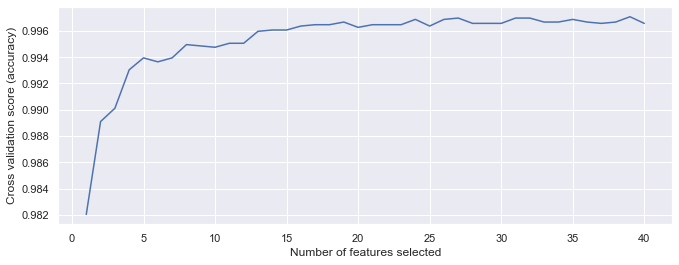

In [ ]:
pretrain = classdict['Normal_U2R'][0]
pretest = classdict['Normal_U2R'][1]
grpclass = 'Normal_U2R'



Xresampled_df = pretrain 
newtest = pretest

Xresampled_dfnew = Xresampled_df[names]
Xresdfnum = Xresampled_dfnew.drop(['service'], axis=1)
Xresdfcat = Xresampled_dfnew[['service']].copy()

Xtest_features = newtest[names]
Xtestdfnum = Xtest_features.drop(['service'], axis=1)
Xtestcat = Xtest_features[['service']].copy()

# Transform train data
X_train_1hotenc = np.array(Xresdfcat)
    
# Transform test data
X_test_1hotenc =np.array(Xtestcat)

X_train = np.concatenate((Xresdfnum.values, X_train_1hotenc), axis=1)
X_test = np.concatenate((Xtestdfnum.values, X_test_1hotenc), axis=1) 

y_train = Xresampled_df[['attack_class']].copy()
c, r = y_train.values.shape
Y_train = y_train.values.reshape(c,)

y_test = newtest[['attack_class']].copy()
c, r = y_test.values.shape
Y_test = y_test.values.reshape(c,)


for i, model in models:
    accuracy = metrics.accuracy_score(Y_test, model.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))
    classification = metrics.classification_report(Y_test, model.predict(X_test))
    print()
    print('============================== {} {} Model Evaluation =============================='.format(grpclass, i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()  
    rfecv.fit(X_test, Y_test)

    print("Optimal number of features : %d" % rfecv.n_features_)

    # Plot number of features VS. cross-validation scores
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross validation score (accuracy)")
    plt.plot(
        range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
        rfecv.grid_scores_,
    )
    plt.show()